In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Load iris dataset
data = load_iris()

# Print dataset info
#print(data.DESCR)

In [4]:
# Create dataframe
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['Class'] = data.target
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [5]:
# Split data table into data X and class labels y
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X.shape, y.shape

((150, 4), (150,))

In [6]:
def plot_iris(X, y, feature_names, target_names, axis=0, figsize=(4.4, 3), clf=None):
    """Plot iris dataset, two by two features.
    
    Parameter
    ---------
        X : ndarray of shape (n_samples, n_featrues)
            Input data.
        y : ndarray of shape (n_samples,)
            Output data (labels).
        feature_names : list of strings
            Names of the featrues.
        target_names : list of strings
            Names of the labels.
        axis : int, default=0
            Axis to adjust the plots, 0 for horizontal and 1 for vertical.
        figsize : tuple of ints, default=(4.4, 3.5)
            Size of each of the two plots.
        clf : 
            Trained sklearn classifier.
    """
    	
    # Create figure with subplots
    if axis == 0:
        fig, axs = plt.subplots(nrows=1, ncols=2,
                                figsize=(figsize[0] * 2, figsize[1]))
    elif axis == 1:
        fig, axs = plt.subplots(nrows=2, ncols=1,
                                figsize=(figsize[0], figsize[1] * 2))
    else:
        raise ValueError("axis must be either 0 or 1")
        
    # Plot each target seperatly with specific color 
    for target, target_name, color in zip(np.unique(y), target_names,
                                          ['b', 'r', 'g']):
        axs[0].scatter(X[y==target, 0], X[y==target, 1], c=color, 
                       edgecolor='k', s=20, label=target_name)
        axs[1].scatter(X[y==target, 2], X[y==target, 3], c=color, 
                       edgecolor='k', s=20, label=target_name)

    # Set label names for subplots
    axs[0].set(xlabel=feature_names[0], ylabel=feature_names[1])
    axs[1].set(xlabel=feature_names[2], ylabel=feature_names[3])

    # Turn on legend in both subplots
    axs[0].legend(), axs[1].legend()
    
    # Plot decision boundaries if trained classifier is given
    if clf:
        if not hasattr(clf, "classes_"):
            raise TypeError("clf must be fitted")
        xlim, ylim = axs[0].get_xlim(), axs[0].get_ylim()
        print(x_lim)
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                             np.linspace(ylim[0], ylim[1], 100))
        print(np.c_([xx.ravel(), yy.ravel()]))
        zz = clf.predict(np.c_([xx.ravel(), yy.ravel()]))
        plt.contourf(xx, yy, zz.reshape(xx.shape), cmap=pl.cm.Paired)

    # Adjust subplots and show 
    fig.tight_layout()
    plt.show()

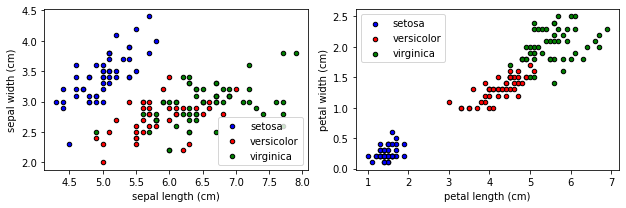

In [7]:
# Plot data
plot_iris(X, y, data.feature_names, data.target_names, axis=0)
plt.show()

In [8]:
# Split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

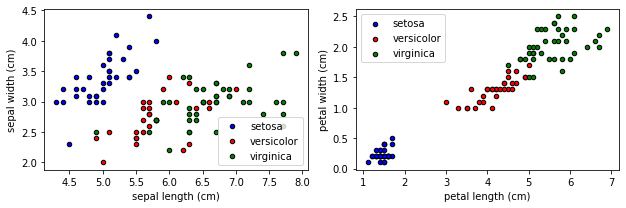

In [9]:
# Plot training data
plot_iris(X_train, y_train, data.feature_names, data.target_names, axis=0)
plt.show()

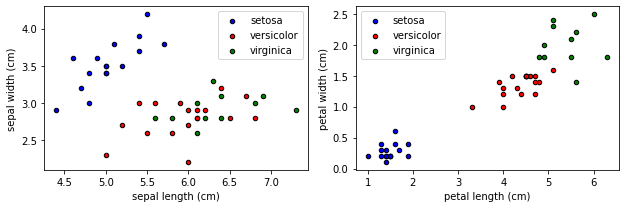

In [10]:
# Plot test data
plot_iris(X_test, y_test, data.feature_names, data.target_names, axis=0)
plt.show()

## KNN

In [11]:
# Paramter grid for knn
param_grid_knn = {
    'clf__n_neighbors': range(1, 10),
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Build pipeline
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', KNeighborsClassifier())
])

# Apply grid search cross validation
grid_search = GridSearchCV(pipe, param_grid_knn).fit(X_train, y_train)

# Show best estimator
grid_search.best_params_

{'clf__metric': 'euclidean', 'clf__n_neighbors': 4, 'clf__weights': 'uniform'}

In [12]:
# Show score of best estimator
grid_search.best_score_

0.9619047619047618

In [13]:
def conf_mat(y_true, y_pred, title='Confusion matrix', target_names=None):
    """Plot confusion matrix as heatmap.
    
    Parameters
    ----------
        y_true : ndarray of shape (n_samples,)
            True labels.
        y_pred : ndarray of shape (n_samples,)
            Predicted labels.
        target_names : list of strings
            Names of the labels.
    """
    df_cm = pd.DataFrame(confusion_matrix(y_true, y_pred), target_names,
                         target_names)
    sn.heatmap(df_cm, annot=True, cmap='YlGnBu', fmt='g')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.title(title)

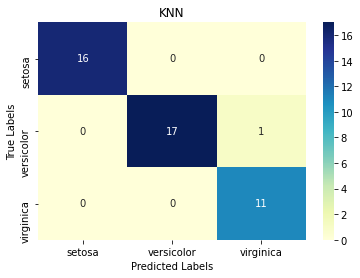

In [14]:
# Plot confusion matrix as heatmap
conf_mat(y_test, grid_search.predict(X_test), "KNN", data.target_names)

In [15]:
# # Plot decision boundaries of the training set
# plot_iris(X_train, y_train, data.feature_names, data.target_names, axis=0,
#           clf=grid_search)

## Logistic regression

In [16]:
# Paramter grid for knn
param_grid_logreg = {
    'clf__C': [0.5, 1, 5, 10],
}

# Build pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# Apply grid search cross validation
grid_search = GridSearchCV(pipe, param_grid_logreg).fit(X_train, y_train)

# Show best estimator
grid_search.best_params_

{'clf__C': 1}

In [17]:
# Show score of best estimator
grid_search.best_score_

0.9523809523809523

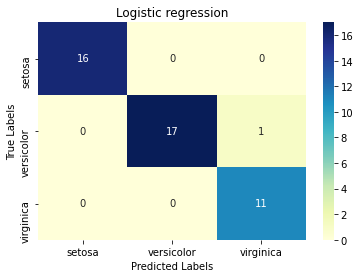

In [18]:
# Plot confusion matrix as heatmap
conf_mat(y_test, grid_search.best_estimator_.predict(X_test),
         "Logistic regression", data.target_names)

## SVM

In [19]:
# Paramter grid for knn
param_grid_svm = {
    'clf__C': [0.5, 1, 5, 10],
}

# Build pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='linear'))
])

# Apply grid search cross validation
grid_search = GridSearchCV(pipe, param_grid_svm).fit(X_train, y_train)

# Show best estimator
grid_search.best_params_

{'clf__C': 1}

In [20]:
# Show score of best estimator
grid_search.best_score_

0.9523809523809523

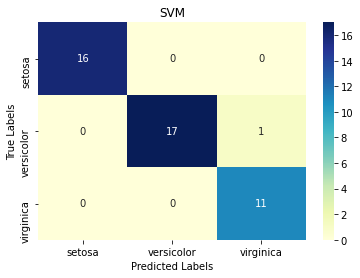

In [21]:
# Plot confusion matrix as heatmap
conf_mat(y_test, grid_search.best_estimator_.predict(X_test),
         "SVM", data.target_names)